**Курсов проект по Обработка на изображения**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
import os
import random

In [2]:
files = os.listdir('Images/')
length_image = cv2.imread('Images/' + files[0], cv2.IMREAD_GRAYSCALE)
old_images = np.empty(shape = [len(files), length_image.shape[0], length_image.shape[1]], dtype = int)
del length_image

In [3]:
scale_percent = 20
width = int(old_images[0].shape[1] * scale_percent / 100)
height = int(old_images[0].shape[0] * scale_percent / 100)
dim = (width, height)
images = np.empty(shape = [len(files), height, width], dtype = int)
for index, file in enumerate(files):
    old_images[index] = cv2.imread('Images/' + file, cv2.IMREAD_GRAYSCALE)
    images[index] = cv2.resize(old_images[index].astype('float32'), dim, interpolation = cv2.INTER_AREA)
    result = cv2.imwrite('Images/Resized/' + str(index) + '.png',images[index])
for image in images:
    print(image.shape[1])
del old_images

832
832
832
832
832
832
832
832
832
832
832


In [4]:
base_image = np.empty(shape = [len(images[0]), len(images[0][0])], dtype = int)
for i in range(len(images[0])):
    for j in range(len(images[0][0])):
        pixel = []
        for index, image in enumerate(images):
            pixel.append(image[i][j])
        base_image[i][j] = np.bincount(pixel).argmax()

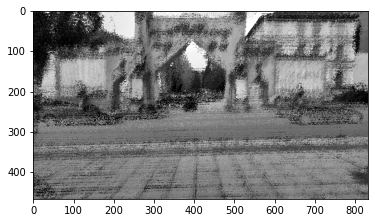

In [5]:
plt.imshow(base_image, 'gray')

In [6]:
base_image = np.empty(shape = [len(images[0]), len(images[0][0])], dtype = int)
for i in range(len(images[0])):
    for j in range(len(images[0][0])):
        pixel = []
        for index, image in enumerate(images):
            for w in range(i - 1, i + 2):
                for h in range(j - 1, j + 2):
                    if not (w < 1 or h < 1 or w + 1 > image.shape[0] or h + 1 > image.shape[1]):
                        pixel.append(image[w][h])
        base_image[i][j] = np.bincount(pixel).argmax()

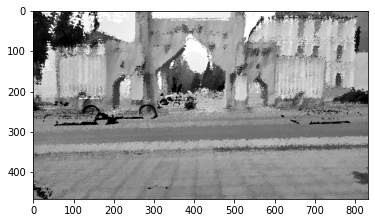

In [7]:
plt.imshow(base_image, 'gray')

In [8]:
base_image = np.empty(shape = [len(images[0]), len(images[0][0])], dtype = int)
for i in range(len(images[0])):
    for j in range(len(images[0][0])):
        pixel = []
        for index, image in enumerate(images):
            for w in range(i - 1, i + 2):
                for h in range(j - 1, j + 2):
                    if not (w < 1 or h < 1 or w + 1 > image.shape[0] or h + 1 > image.shape[1]):
                        pixel.append(image[w][h])
        #base_image[i][j] = np.bincount(pixel).argmax()
        base_image[i][j] = statistics.mean(pixel)

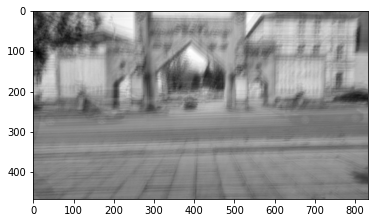

In [9]:
plt.imshow(base_image, 'gray')

In [10]:
new_image = np.empty(shape = [len(images[0]), len(images[0][0])], dtype = int)
for i in range(len(images[0])):
    for j in range(len(images[0][0])):
        pixel = []
        for index, image in enumerate(images):
            for w in range(i - 1, i + 2):
                for h in range(j - 1, j + 2):
                    if not (w < 1 or h < 1 or w + 1 > image.shape[0] or h + 1 > image.shape[1]):
                        pixel.append(image[w][h])
        #base_image[i][j] = np.bincount(pixel).argmax()
        base_image[i][j] = statistics.median(pixel)

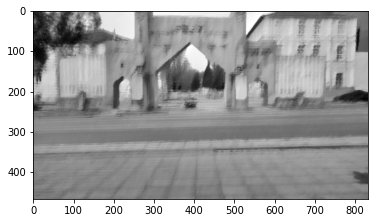

In [11]:
plt.imshow(base_image, 'gray')

In [12]:
max_pixel_difference = 55
new_base_image = base_image
#index_cleared_image = random.randrange(0, len(images))
index_cleared_image = 4
cleared_image = np.array(images[index_cleared_image])
cleared_image_excluded_pixel_coordinates = []
for i in range(len(cleared_image)):
    for j in range(len(cleared_image[0])):
        if abs(cleared_image[i][j] - base_image[i][j]) > max_pixel_difference:
            cleared_image_excluded_pixel_coordinates.append((i, j))
            cleared_image[i][j] = 255

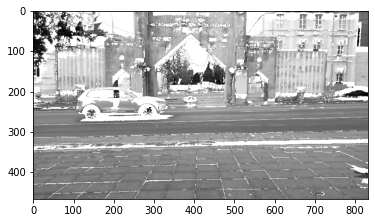

In [13]:
plt.imshow(cleared_image, 'gray')

In [15]:
number_of_useless_pixels = []
for index, image in enumerate(images):
    if index == index_cleared_image:
        number_of_useless_pixels.append(len(image) * len(image[0]))
        continue
    useless_pixels = 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (abs(image[i][j] - base_image[i][j]) > max_pixel_difference) and ((i, j) in cleared_image_excluded_pixel_coordinates):
                useless_pixels += 1
    number_of_useless_pixels.append(useless_pixels)

In [16]:
image = np.array(images[np.argmin(number_of_useless_pixels)])
for i in range(len(image)):
    for j in range(len(image[0])):
        if (i, j) in cleared_image_excluded_pixel_coordinates:
            cleared_image[i][j] = image[i][j]

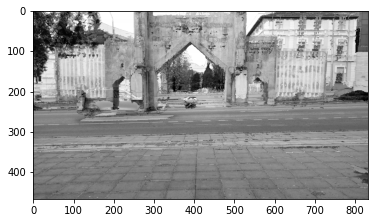

In [17]:
plt.imshow(cleared_image, 'gray')

In [18]:
max_pixel_difference = 55
#index_cleared_image = random.randrange(0, len(images))
index_cleared_image = 4
cleared_image = np.array(images[index_cleared_image])
cleared_image_excluded_pixel_coordinates = []
for i in range(len(cleared_image)):
    for j in range(len(cleared_image[0])):
        if abs(cleared_image[i][j] - base_image[i][j]) > max_pixel_difference:
            cleared_image_excluded_pixel_coordinates.append((i, j))
            cleared_image[i][j] = 255

In [19]:
pixel_error = []
for index, image in enumerate(images):
    if ilist=RDWBHv0pO94JQ&start_radio=1ndex == index_cleared_image:
        pixel_error.append(len(image) * len(image[0]) * 255)
        continue
    error = 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (abs(image[i][j] - base_image[i][j]) > max_pixel_difference) and ((i, j) in cleared_image_excluded_pixel_coordinates):
                error += 255
            else:
                error += abs(image[i][j] - base_image[i][j])
    pixel_error.append(error)

In [20]:
image = np.array(images[np.argmin(pixel_error)])
for i in range(len(image)):
    for j in range(len(image[0])):
        if (i, j) in cleared_image_excluded_pixel_coordinates:
            cleared_image[i][j] = image[i][j]

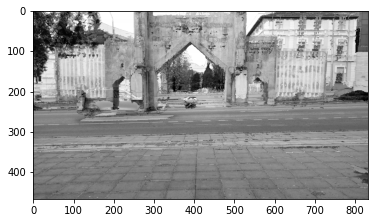

In [21]:
plt.imshow(cleared_image, 'gray')